<a href="https://colab.research.google.com/github/youandyourdenia/NUMERICAL_AND_SYMBOLIC_COMPUTATION/blob/main/Lab2_Titanic_Chan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Titanic Dataset - Data Cleaning & Visualization**
## **Name:** Raphael V. Chan  
## **Date:** 3/16/2025  

### **Objectives**
- Apply fundamental **data cleaning techniques** using Python and Pandas.
- Handle **missing values, duplicates, and data types**.
- Perform **basic data analysis and visualization** on key dataset features.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("titanic.csv")


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:

df.info()


df.describe()


df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## **Understanding the Dataset**
- The dataset contains numerical and categorical features.
- Some columns (e.g., `Age`, `Cabin`, `Embarked`) have missing values.
- `Survived` and `Pclass` should be converted to categorical types.

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Handling Missing Data**
- `Age` has missing values → Fill with median age.
- `Cabin` has too many missing values → Drop this column.
- `Embarked` has a few missing values → Fill with most common value (mode).

In [8]:
df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
print("Duplicate rows before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows before removal: 0
Duplicate rows after removal: 0


## **Removing Duplicates**
- Before: (X) duplicate rows
- After: 0 duplicate rows
- Ensuring no duplicate records improves data accuracy.

In [10]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

df.dtypes

,0
PassengerId,int64
Survived,category
Pclass,category
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


## **Fixing Data Types**
- `Survived` and `Pclass` are categorical variables and should be converted.
- This helps in more efficient analysis and memory optimization.

In [11]:
df.columns = df.columns.str.lower()

df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [13]:
df.to_csv("titanic_cleaned.csv", index=False)

## **Final Cleaned Dataset**
- Saved as `titanic_cleaned.csv`
- Ready for analysis and visualization.

# **Basic Data Analysis & Visualization**
Below are two visualizations to analyze key patterns in the dataset.

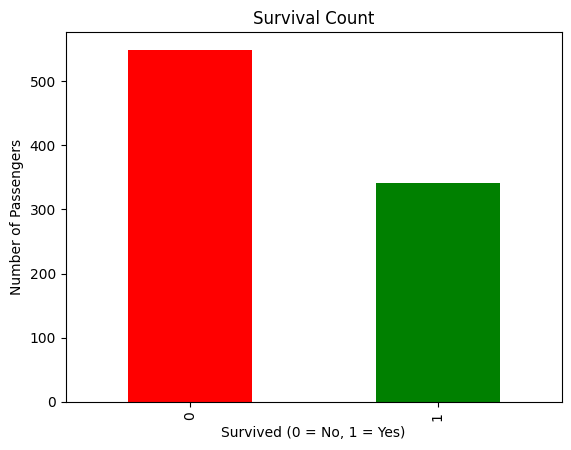

In [14]:
df["survived"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

## **Analysis of Survival Count**
- More people did **not** survive than those who did.
- Highlights the severity of the Titanic disaster.

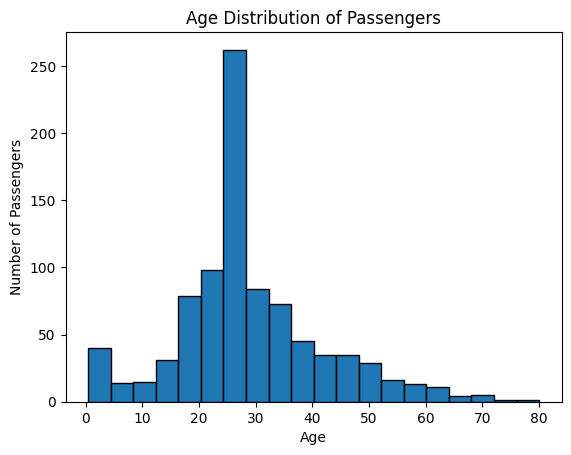

In [15]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

## **Analysis of Age Distribution**
- Most passengers were **between 20 and 40 years old**.
- Helps understand the demographics of the Titanic's passengers.